# Why Deep Learning?

If you have been interested in the AI field for the last years you have probably heard cool names such as Machine Learning, Deep Learning, Supervised and Unsupervised Learning, training... But do you really know what they mean? The goal of this Python Notebook is no more than giving a summary of why we are where we are in this field.

## What is Machine Learning? 

You can find plenty of people who talks about Machine Learning (which we will mention as ML from now on) but not all of them know exactly what it is referring to.

### ML vs AI

Is ML the same than AI? Conceptually, not. AI is the science of developing systems able to perform given tasks. If I want to build a face recognizer, I must use AI. 

ML is just an approach to AI, which consists on developing a system to learn from collected data, so it can apply its knowledge to perform the given task. In our case think about a big collection of faces from two people from which it learns to recognize them. 

Ideally, there exist approaches to AI which do not necessarily include ML, such as hand-designed decision trees, which do not infer their knowledge from previous examples but directly from the programmers criterion. After reading that you will probably think that non-ML based AI is a deprecated and decrepit science but it is just an easy to understand example to begin with. In fact, there are non-ML approaches which are already known but still have to reach their peak, such as Reinforcement Learning (RL).

 

### Problems of ML

ML is commonly used to solve specific tasks. They can be grouped in some common types.

A common and easy to understand type of tasks is *Classification*. It consists in assigning classes to instances. For example, one simple classification task is classifying between cats and dogs from a collection of photos. Inside this kind of problems we can find a huge variability, and scientists are still introducing issues to be solved. That could be the case of *fine-grained image recognition* or *few-shot learning*. I will not focus on those problems (in a general sense they mean classifyig between similar classes from slight differences and classifying from a few examples respectively), but I just want to remark that from the generic idea of classification we can find plenty of concrete situations which could make the problem harder and would require us to think in a more robust approach to face the new issues.

Another kind of tasks is *Detection*, which could be seen as a binary classification with restrictions. It consists in finding where is some instance in the input data. For example, finding the *bounding box* (which is already a restriction) containing a face in an image.

We also can make *Generation* tasks, which consist in generating some kind of data (e.g. a painting) from seen examples. This kind of tasks is more abstract to evaluate.

One of the most common kind of tasks of ML is *Regression*. They consist in making some value prediction given input data. An example of this could be a temperature predictor for tomorrow, given some measures taken today.

We can see how the nature of the problem that we try to solve can classify our task in some group, but there is another way to define the ML strategy we will follow to solve our problem depending on its nature. I am talking about *Supervised* and *Unsupervised* learning.

In *Supervised learning* we show the system a set of samples and its *ground truth* (the solution of the problem for that sample), which depends on the problem (e.g for classification it tells the class of the sample, for detection it tells the location of the bounding box it should predict), and we want it to be able to solve the problem for new samples later. That means that we want it to learn patterns for each solution.

In *Unsupervised learning* we just show data without annotations to the system, and the idea is that it finds some patterns on it, disregarding the real solution. Therefore, it just will find some data distribution and will learn to differentiate it without having any knowledge of what is it at all.

In the following summary we will refer to *Supervised learning*, which will be enough to understand. We will just make a reference to unsupervised learning to verify how it fits.

### Traditional ML scheme

The are plenty of traditional ML algorithms which may seem very different, but they can be summarized by a common scheme. See it on the image below.

<img src="ml_scheme.png">

The first step is the *Data acquisition*, which may seem obvious but is in practice one step with a huge cost. Depending on the application it could need not only the *data collection* substep, but also further actions such as *data formatting* or *data preprocessing*. For data formatting I refer to adapting it into the domain that we need, for example, in [this simple system](https://upcommons.upc.edu/bitstream/handle/2117/83252/TFG_IgnasiMas_MathematicalExpressionRecognition.pdf) that I developed to identify handwritten mathematical expressions I applied an adaptation of the data referred to the trace to image. We could even include image resampling if it is needed. In some cases, the data labelling (we will go on that later) also needs some formatting (e.g. representing classes by some kind of vector, tipically one-hot-vectors). For data preprocessing we could imagine an image which needs some kind of cleaning or to make things easy we could also imagine a simple binarization. 

After that we have a *dataset* (key concept), which basically is a collection of labelled data samples with homogeneous format for both data and label over the different samples.

There is tipically one final substep on the *data acquisition* step, which is *data split*. The dataset is split in subsets. The 3 common splits are *training set*, *validation set* and *test set*. We will skip the reason to the following paragraphs.

Note that there are 2 pipelines, which refer to the two main stages of a ML system. The one above is the *training stage* and refers to the stage where the system learns. That means that it finds the patterns of the data for making a decision. In the case of classification, it finds prototypes of each class and boundaries between them. In the case of regression, it finds the way how the input data influences on the final decision. Let's see it in more detail.

In the training pipeline we find a *feature extraction* step. What does it mean? Let's see it in a graph.

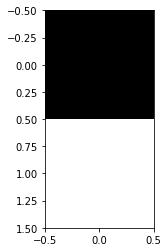

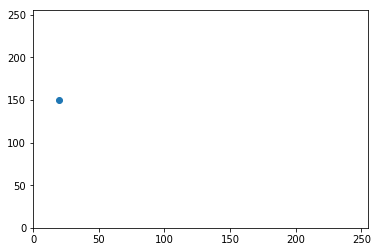

In [2]:
% matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

# Modify the following values which represent the image and feature space to see its effect
a = 20
b = 150

a = min(max(a, 0), 255)
b = min(max(b, 0), 255)

plt.close()
plt.clf()
dummy_img = np.array([[a], [b]])
fig1 = plt.figure(1)
plt.imshow(dummy_img, cmap='gray')
fig2 = plt.figure(2)
plt.scatter(a, b)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()

Imagine that dummy example where the input data is that 2-pixel image. Imagine it has a given label. We must define a feature space to represent the image. In a feature space, we represent each sample in an N-dimensional space where each feature is a dimension. In that case we could simply represent it as a 2D feature space where each pixel is a feature with values between 0 and 255 (its intensity). It is a simple example of some *feature extraction* from a given input.

Let's add a little bit of difficulty. Imagine now a 2x2 image and now our feature space will be based on the X and Y derivatives. That is another 2D feature space.

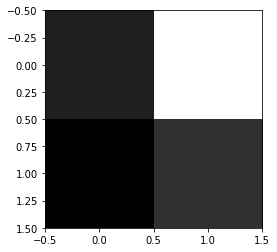

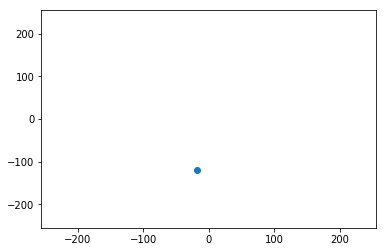

In [3]:
% matplotlib inline

# Modify the following values which represent the image and feature space to see its effect
a = 20
b = 150
c = 2
d = 30

a = min(max(a, 0), 255)
b = min(max(b, 0), 255)
c = min(max(c, 0), 255)
d = min(max(d, 0), 255)

plt.close()
plt.clf()
dummy_img = np.array([[a, b], [c, d]])
fig1 = plt.figure(1)
plt.imshow(dummy_img, cmap='gray')
fig2 = plt.figure(2)
plt.scatter(c - a, d - b)
plt.xlim(-255, 255)
plt.ylim(-255, 255)
plt.show()

Note that in that type of pipeline we must define the feature space by hand. We have defined simple examples, but the decision could be harder for more complex examples, such a human face recognizer, where the features are in a higher dimensional space. As a human decision, that could lead us to errors, and require a lot of work of both reasoning and experimenting.

For complex examples, often *descriptors* are used, where we can use some detector to find the features and some descriptor to represent them in some format to locate them in the feature space (e.g. for the face recognition example, we detect some common features on the face and then we store the representation).

For the *data storage*, depending on the algorithm, we could find a class representation (e.g. an average per feature) or use the trained data somehow to prepare it for production.

Now let's talk about the *testing stage*. It basically is the system running om production, which means applying the task over the input data on the *test set* or on new samples. In the case of the *test set*, where in the case of supervised learning we have labels, the system is evaluated.

In more detail, the same *feature extraction* step than in the training stage is applied (it must get the same kind of representation). In the testing case, the representation is compared to the stored data from training to get a result. For example, in the case of pattern matching for classification the representation from the new sample could be compared to the trained samples or to some prototype of each class using some distance (e.g. MSE), or evaluated between some defined boundaries on the trained feature space. There are more robust approaches which make a more complex use of the feature space such as *Support Vector Machines* (*SVM*), but we will not focus on that.

And now, remember what we told about the *data split* step? Just be patient, we will be ready to understand it after introducing the following concept!

It is a common case that we have some bias in our collected data. For example, imagine a face detector trained with photos taken over the population of some given country. The detector could learn the features very fit to the trained faces. But now imagine that on production appear faces from another country. Since the traits can be completely different the features can be evaluating some incorrect features.

Let's look how it is seen on a graph. The system learns a boundary which works almost perfectly for the trained samples but it is focusing in some irrelevant shapes from training data which differ completely to the ones found on production.

<img src="overfitting.png">

That phenomenom is known as *overfitting*. The systems fits so tight to the trained data that it does not tolerate differences from new samples.

Now we are prepared to know why we need *data split*. As mentioned, we use the *training set* on the *training stage*, and the *test set* on the *testing stage*. The goal of the *testing stage* is to evaluate the performance of the system on new data, which also means evaluating that it does not suffer from overfitting. Therefore, the *training* and *test* sets must contain completely different samples, since the evaluation must be on new data. If the results on the *test set* are poor, we can evaluate on *training set* samples. If in the training case we have much better results, we could be suffering from overfitting. Else, the system simply performs poorly and we should solve it somehow (redefining the algorithm, selecting other features, preprocessing the data in some other way...).

And what about the *validation set*? It is a completely different set, which is also used to prevent overfitting. It is used on training to evaluate the system for making some modifications which are not directly related to the data. For example, imagine that we want to ponderate the feature space to give more importance to some feature. We could base that ponderation on the different evaluations done on the *validation set*.

Although that is the ideal way of working, in some real scenarios one could want to use other settings, such as using all the data on the *training set* (e.g. if the amount is too low and one tends to think that the data is representative enough), but the system would be more likely to suffer overfitting.

### Traditional ML issues

When the system described in the previous section is trained good enough, it can run alone and achieve good results. But you may have note that a lot of human supervision and hand-crafting is involved in the process.

The cost of the *data acquisition* depends on the problem. For example, we don't need to label the samples on the dataset for the unsupervised learning problems (just if we want to perform an evaluation), but for the previous scheme we always need to define the feature space, which is a difficult task.

That could be solved if some system was able to learn the relevant features alone, and that is more or less approached by Deep Learning.

## What is Deep Learning?

You have probably heard about Deep Learning(DL) lately. Knowing the theory explained before about ML, we are ready to understand what DL is exactly. 

### DL vs ML

Is DL another concept than ML? Well, it is a set of techniques of ML. We could say that DL is an approach to ML as well as ML is an approach to AI.

DL is characterized by using algorithms called *Neural Networks*. On that Notebook I will no go deep on that, but the idea of *Neural Networks* is given some input, apply different operations (as a simulation of neurons) at what is called *nodes* to create some responses. That responses are then given to another group of nodes, and that is repeated until the end, when somehow the final responses are combined to give some joint response that will make the system take a final decision. Each group of nodes is a layer.

<img src="nn.jpg">

DL uses *Convolutional Neural Networks* (*CNN's*), where each node can be seen as a filter. Each filter is convolved over the input data (typically images) to get a repsonse (take a look to the theory of convolution if you are not familiarized). Therefore, the filters are patterns (shapes) that can be found on the image. Note that at the first label only primal patterns are found but on further layers it can find higher dimensional features, even getting a semantical sense in some cases. The different levels of the features are combined sometimes.

The ideal *CNN's* have many layers in order to get different levels on abstraction for the features. That's why DL is *Deep*. 

But which filters does a *CNN* use? Well, that is what the DL system learns at the *training stage*.

Given some initial filters it evaluates their performance and update them depending on it. That is the main idea.

How is that performance evaluated? It uses a tool called the *Loss function*. It is a metric that compares the real label and the prediction of the different samples. The closer, the lower is the value of the *Loss*.

As we have mentioned, the *CNN* in the *training stage* begins with some initial filters (there are different kind of initialization, but let's imagine a random one) and evaluates them with a samples from the *training set* (yes, we need *data split* again) called a *batch* using the Loss function. Let's modify the filters and make another iteration with different samples. The Loss function will now give a different result. We must repeat that iteratively.

But wait a moment. How are we modifying the filters, randomly? Of course not. Filters are in fact, feature spaces through which the Loss function value is updating. Imagine a dummy *CNN* that just has one simple 2-pixel filter. The loss function can be imagined as a surface over a 2D plane, since it is a function that depends on two variables. Obviously, we cannot determine the whole surface, but we can sample some points on it and draw a trajectory. That trajectory can be seen as the gradient between each two consecutively sampled points. 

Now, note that ideally we want to find the optimal value for the filter. That is the lowest point of the surface, which is the lowest value of the *Loss function*. Intuitively, we can follow the gradient to find it right? That is exactly what the *CNN* does on the *training stage*. To update the filters, at each iteration it "jumps" in the direction of the gradient of the *Loss function*. How coarse or fine is this jump is determined by the *learning rate*. High learning rates will make the *CNN* approach faster to the optimal value when far, but will have more difficulty to find it in a finer scale, while low ones will be more accurate but slower to approach when far. It is usual to define hybrid learning rates that are higher at the beginning and become lower when they approach to the optimal value, and there are algorithms to define that.

We have seen an exaple with just one 2-pixel filter, but that can be extended to any *CNN* using the appropiate N-dimensional feature space.

There are many training strategies, such as freezing some layers and just updating the other ones and at some point swapping them.

At the testing stage, the *CNN* just predicts the result given the inputs using the trained filters.

As we have already seen, *data split* is also necessary for DL since the overfitting phenomenom is common for all ML. In the case of DL, the *validation set* is used to evaluate some parameters such as the *learning rate* (for further update) or the likelihood of the performance to have reached *convergence* (when the optimal value is some close that we can't note any improvement in any direction).

### DL with Keras

You may have noticed that in the previous definition of a DL system we have gone from lower to higher abstraction level where we define our task with DL instances which have a semantical sense. A complete Neural Network has a lot of low level mathematical operations. When we define a new architecture we just want to add some layers, connections, modify them and just sometimes define new operations. Imagine that we had to implement all the mathematical operations for each architecture. Fortunately, in DL we have *frameworks*, which are sets of libraries with standard DL operations and instances. There are low level frameworks, which just give us the operations and let us implement the instances (e.g. layers). In high level frameworks, they already give us those instances and let us build architectures just adding and parametrizing them, as if we were playing with boxes.

In this notebook we will focus on Keras, which is a high level framework which works over a backend framework (which can be both Theano and Tensorflow) for the low level mathematical stuff. In the following code block, we have already defined a CNN. Play with it. Add layers, modify its parameters. Keras has so much to see and it is not the point of this notebook to explain it, but if you want to experiment a little bit more look at its [online documentation](https://keras.io/).

In [4]:
import keras
from keras.models import Model
from keras.layers import Convolution2D, Input, Dense, Flatten
from keras.layers.pooling import MaxPooling2D
from keras.activations import sigmoid, softmax
from keras.optimizers import SGD


def build_dummy_network():
    
    model_input = Input(shape=(224, 224, 3))

    x = Convolution2D(filters=3, 
                      kernel_size=(3, 3),
                      strides=(5, 5),
                      padding='valid',
                      activation=sigmoid,
                      name='first_layer')(model_input)
    
    x = MaxPooling2D((2, 2), strides=(2, 2), name='pooling_layer_1')(x)
    
    x = Convolution2D(filters=3, 
                      kernel_size=(3, 3),
                      strides=(5, 5),
                      padding='valid',
                      activation=softmax,
                      name='second_layer')(x)
    
    x = MaxPooling2D((2, 2), strides=(3, 3), name='pooling_layer_2')(x)
    
    x = Flatten(name='flatten')(x)
    
    x = Dense(units=4, name='dense_layer', activation='softmax')(x)
    
    model = Model(input=[model_input], output=[x])
    
    return model


model = build_dummy_network()
model.summary()



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
first_layer (Conv2D)         (None, 45, 45, 3)         84        
_________________________________________________________________
pooling_layer_1 (MaxPooling2 (None, 22, 22, 3)         0         
_________________________________________________________________
second_layer (Conv2D)        (None, 4, 4, 3)           84        
_________________________________________________________________
pooling_layer_2 (MaxPooling2 (None, 1, 1, 3)           0         
_________________________________________________________________
flatten (Flatten)            (None, 3)                 0         
_________________________________________________________________
dense_layer (Dense)          (None, 4)                 16        
Total para

d:\users\leylo\life_reborn\curro\notebooks\venv\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


Now we can train and evaluate this previous model. In the following example we do it with dummy data that we generate. I remark that the data is dummy, so don't attention to the score value, but it should be useful to understand a training and evaluation process.

In [5]:
x_train = np.concatenate((np.zeros((20, 224, 224, 3)), 
                          np.ones((20, 224, 224, 3))),
                         axis=0)
y_train = keras.utils.to_categorical(np.concatenate((np.zeros((20, 1)), 
                                                     np.ones((20, 1))),
                                                    axis=0), num_classes=4)
x_test = np.concatenate((np.zeros((10, 224, 224, 3)), 
                          np.ones((10, 224, 224, 3))),
                         axis=0)
y_test = keras.utils.to_categorical(np.concatenate((np.zeros((10, 1)), 
                                                     np.ones((10, 1))),
                                                    axis=0), num_classes=4)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

model.fit(x_train, y_train, batch_size=32, epochs=3)
score = model.evaluate(x_test, y_test, batch_size=32)
print('Score: ')
print(score)

Epoch 1/3
40/40 [==============================] - 1s 29ms/step - loss: 1.4539
Epoch 2/3
40/40 [==============================] - 0s 2ms/step - loss: 1.4270
Epoch 3/3
20/20 [==============================] - 0s 3ms/step
Score: 
1.3402401208877563


### What does DL give us?

The spread of DL has been due to simply some circumstances. The current hardware of the GPUs make easy to process convolutions, so we currently have the optimal hardware for *CNN's*, plus the spread of the internet as a tool for science sharing among other things. All that has been the motivation of the new DL hype.

Moreover, it improves some of the limitations mentioned about previous approaches. In contrast with traditional ML, DL lets us not worry about defining any feature space, since it defines it itself in the *training stage*. That's good because it releases us from some work on defining the most relevant features, but at the same time it can be dangerous if we don't take care, since we loose control of what we are doing.

That is the reason why it has some detractors, because most of the community tend to just experiment with boxes without going low levela nd there is people against that.

My personal opinion on that is that DL is a positive step in  ML (therefore in AI) as long as we know what we are doing.

Currently, the state of the art on many tasks is achieved by DL approaches.